In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [6]:
# %config InlineBackend.figure_format = 'svg'

# Basic EDA

In [7]:
# All subtasks using the same text data
train_df_1 = pd.read_csv("./dev_phase/subtask1/train/eng.csv")
train_df_2 = pd.read_csv("./dev_phase/subtask2/train/eng.csv")
train_df_3 = pd.read_csv("./dev_phase/subtask3/train/eng.csv")
dev_df = pd.read_csv("./dev_phase/subtask1/dev/eng.csv")

# Subtask 1

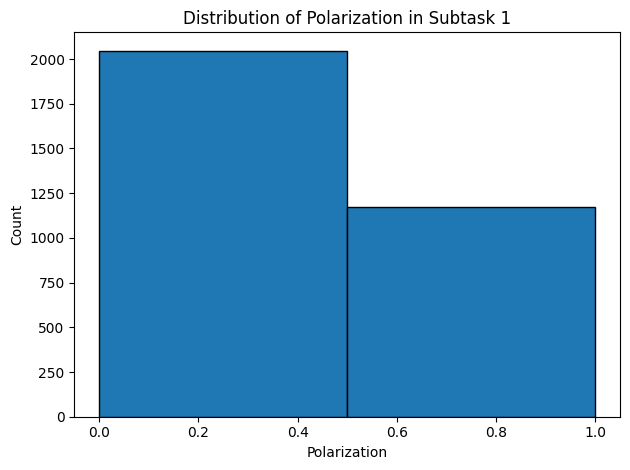

In [8]:
plt.hist(train_df_1["polarization"], bins=len(train_df_1["polarization"].unique()), edgecolor='black')
plt.title("Distribution of Polarization in Subtask 1")
plt.xlabel("Polarization")
plt.ylabel("Count")
plt.tight_layout()
# save as pdf in figures
# plt.savefig("../ACL/figures/subtask1_polarization_distribution.pdf")
plt.show()

# Subtask 2

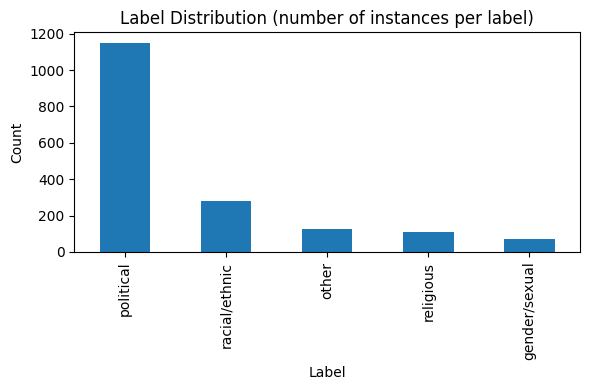

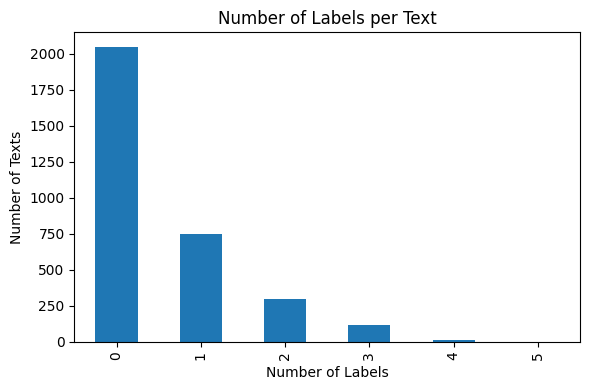

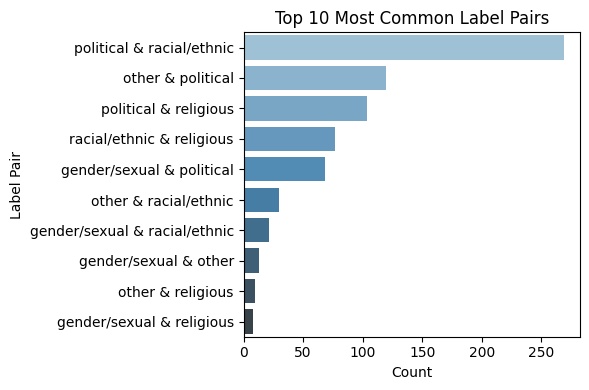

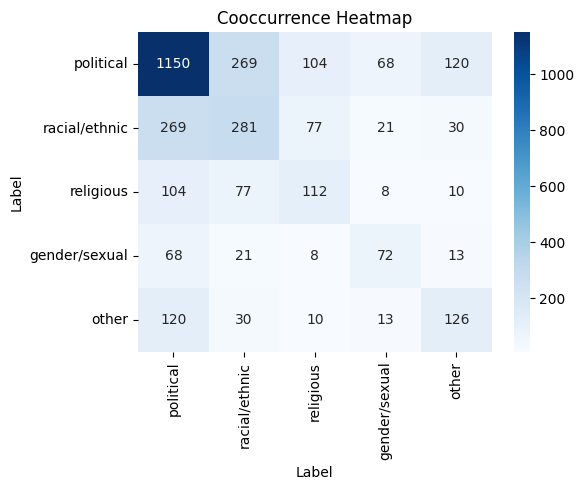

In [9]:
import itertools
import seaborn as sns

# List of label columns
label_cols = train_df_2.columns[2:]

# Prepare data for plotting
label_counts = train_df_2[label_cols].sum().sort_values(ascending=False)

num_labels_per_text = train_df_2[label_cols].sum(axis=1)
num_labels_value_counts = num_labels_per_text.value_counts().sort_index()

pair_counts = {}
for labels in train_df_2[label_cols].values:
    active = [label_cols[i] for i, v in enumerate(labels) if v]
    for pair in itertools.combinations(sorted(active), 2):
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

pair_counts_sorted = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)
top_n = 10
top_pairs = pair_counts_sorted[:top_n]
pairs = [' & '.join(pair) for pair, _ in top_pairs]
counts = [count for _, count in top_pairs]

cooccurrence_matrix = np.zeros((len(label_cols), len(label_cols)), dtype=int)
for labels in train_df_2[label_cols].values:
    active_idx = [i for i, v in enumerate(labels) if v]
    for i in active_idx:
        for j in active_idx:
            cooccurrence_matrix[i, j] += 1

# 1. Label distribution (bar chart)
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title("Label Distribution (number of instances per label)")
plt.ylabel("Count")
plt.xlabel("Label")
plt.tight_layout()
plt.show()

# 2. Number of labels per text
plt.figure(figsize=(6, 4))
num_labels_value_counts.plot(kind='bar')
plt.title("Number of Labels per Text")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Texts")
plt.tight_layout()
plt.show()

# 3. Most common label pairs (sorted)
plt.figure(figsize=(6, 4))
sns.barplot(x=counts, y=pairs, hue=pairs, palette="Blues_d", legend=False)
plt.title("Top 10 Most Common Label Pairs")
plt.xlabel("Count")
plt.ylabel("Label Pair")
plt.tight_layout()
plt.show()

# 4. Cooccurrence heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cooccurrence_matrix,
    xticklabels=label_cols,
    yticklabels=label_cols,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Cooccurrence Heatmap")
plt.xlabel("Label")
plt.ylabel("Label")
plt.tight_layout()
# plt.savefig("../ACL/figures/subtask2_cooccurrence_heatmap.pdf")
plt.show()

# Subtask 3

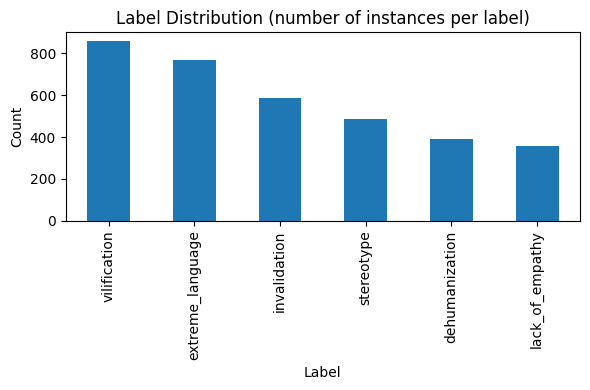

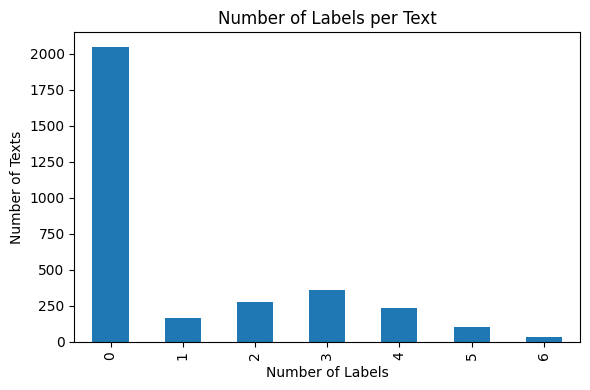

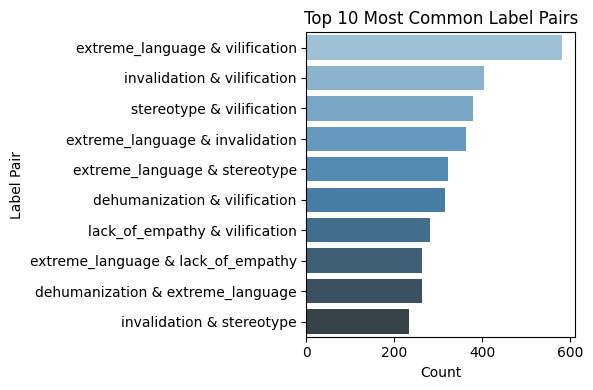

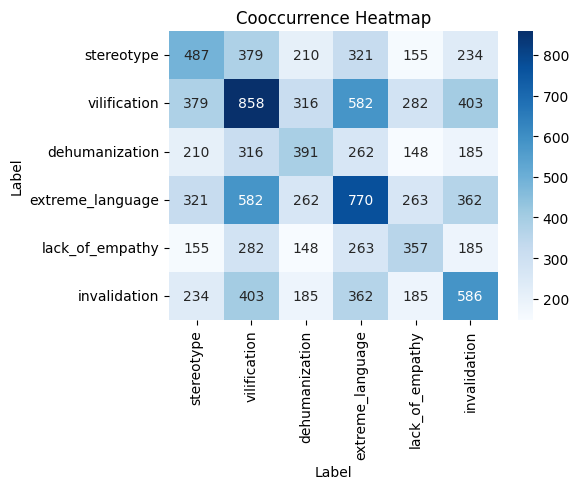

In [10]:
import itertools
import seaborn as sns

# List of label columns
label_cols = train_df_3.columns[2:]

# Prepare data for plotting
label_counts = train_df_3[label_cols].sum().sort_values(ascending=False)

num_labels_per_text = train_df_3[label_cols].sum(axis=1)
num_labels_value_counts = num_labels_per_text.value_counts().sort_index()

pair_counts = {}
for labels in train_df_3[label_cols].values:
    active = [label_cols[i] for i, v in enumerate(labels) if v]
    for pair in itertools.combinations(sorted(active), 2):
        pair_counts[pair] = pair_counts.get(pair, 0) + 1

pair_counts_sorted = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)
top_n = 10
top_pairs = pair_counts_sorted[:top_n]
pairs = [' & '.join(pair) for pair, _ in top_pairs]
counts = [count for _, count in top_pairs]

cooccurrence_matrix = np.zeros((len(label_cols), len(label_cols)), dtype=int)
for labels in train_df_3[label_cols].values:
    active_idx = [i for i, v in enumerate(labels) if v]
    for i in active_idx:
        for j in active_idx:
            cooccurrence_matrix[i, j] += 1

# 1. Label distribution (bar chart)
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title("Label Distribution (number of instances per label)")
plt.ylabel("Count")
plt.xlabel("Label")
plt.tight_layout()
plt.show()

# 2. Number of labels per text
plt.figure(figsize=(6, 4))
num_labels_value_counts.plot(kind='bar')
plt.title("Number of Labels per Text")
plt.xlabel("Number of Labels")
plt.ylabel("Number of Texts")
plt.tight_layout()
plt.show()

# 3. Most common label pairs (sorted)
plt.figure(figsize=(6, 4))
sns.barplot(x=counts, y=pairs, hue=pairs, palette="Blues_d", legend=False)
plt.title("Top 10 Most Common Label Pairs")
plt.xlabel("Count")
plt.ylabel("Label Pair")
plt.tight_layout()
plt.show()

# 4. Cooccurrence heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cooccurrence_matrix,
    xticklabels=label_cols,
    yticklabels=label_cols,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Cooccurrence Heatmap")
plt.xlabel("Label")
plt.ylabel("Label")
plt.tight_layout()
# plt.savefig("../ACL/figures/subtask3_cooccurrence_heatmap.pdf")
plt.show()